In [1]:
import numpy as np
import matplotlib.pyplot as plt
from npeb import PMixture

In [15]:
n = 50
mus = np.random.uniform(0,10,n)
cost = 3

### generate Poisson data
data = np.random.poisson(mus)

In [16]:
### F Modelling for Poisson Data
# Relies on the Robbins Formula E[mu | X = x] = (x+1)f(x+1)/f(x).
# We should pick all datapoints such that (x+1)f(x+1) >= C*f(x)

counts,_ = np.histogram(data,bins = np.arange(51))
decision_x = np.arange(1,len(counts))*counts[1:] >= cost*counts[:-1]
#print(decision_x)

mask = np.isin(data, np.argwhere(decision_x == True))

In [17]:
### Unbiased Bayes Welfare Estimator
UWE = np.zeros(20)
UWE_Part_I = np.zeros(20)
UWE_Part_II = np.zeros(20)
for i in range(20):
  UWE_Part_I[i] = np.sum(data[data >= i+1])
  UWE_Part_II[i] = cost*np.sum(data >= i)

UWE = UWE_Part_I - UWE_Part_II

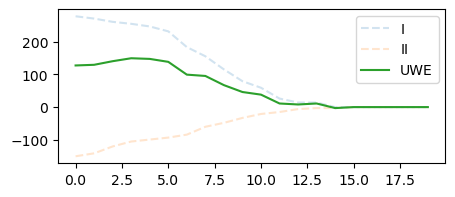

In [18]:
plt.figure(figsize = (5,2))
plt.plot(range(20), UWE_Part_I, label = "I", alpha = 0.2, linestyle = 'dashed')
plt.plot(range(20), -UWE_Part_II, label = "II", alpha = 0.2, linestyle = 'dashed')
plt.plot(range(20), UWE, label = "UWE")
plt.legend()

### Can also visualize the true risk curve and the true Bayes risk curve

In [31]:
model = PMixture()
model.fit(data)
posterior_means = model.posterior_mean(data)

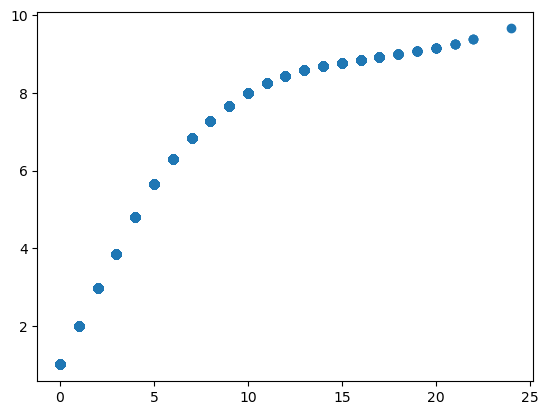

In [32]:
plt.scatter(data,posterior_means)

In [10]:
indices = range(50)
threshold = indices[np.argmax(UWE)]
print(threshold)


oracle_welfare = np.sum(mus[mus >= cost] - cost)
print(oracle_welfare)

uwe_welfare = np.sum(mus[data >= threshold] - cost)
print(f"UWE Regret:{oracle_welfare - uwe_welfare}")

npmle_welfare = np.sum(mus[posterior_means >= cost] - cost)
print(f"NPMLE Regret:{oracle_welfare - npmle_welfare}")

naive_welfare = np.sum(mus[data >= cost] - cost)
print(f"Naive Regret:{oracle_welfare - naive_welfare}")

robbins_welfare = np.sum(mus[mask] - cost)
print(f"Robbins Regret:{oracle_welfare - robbins_welfare}")

8
15.153478573645279
UWE Regret:20.39592659122711


NameError: name 'posterior_means' is not defined

In [36]:
from tqdm import tqdm

In [53]:
# Bayes Risk Calculations
MAX_BOUND = 100
mc_samples = 500
n = 1000

uwe_regrets = np.zeros(mc_samples)
naive_regrets = np.zeros(mc_samples)
robbins_regrets = np.zeros(mc_samples)
npmle_regrets = np.zeros(mc_samples)

for s in tqdm(range(mc_samples)):

  ## mixture
  #mu1 = np.maximum(0,np.random.normal(18,1,n))
  #mu2 = np.maximum(0,np.random.normal(5,8,n))
  #mus = np.where(np.random.rand(n) < 0.05, mu1, mu2)

  mus = np.maximum(0,np.random.normal(15,3,n))
  cost = 16
  data = np.random.poisson(mus)

  oracle_welfare = np.sum(mus[mus >= cost] - cost)

  ### UWE
  UWE = np.zeros(MAX_BOUND)
  for i in range(MAX_BOUND):
    UWE[i] = np.sum(data[data >= i+1]) - cost*np.sum(data >= i)

  indices = range(MAX_BOUND)
  threshold = indices[np.argmax(UWE)]
  uwe_welfare = np.sum(mus[data >= threshold] - cost)

  naive_welfare = np.sum(mus[data >= cost] - cost)

  ### Robbins
  counts,_ = np.histogram(data,bins = np.arange(51))
  decision_x = np.arange(1,len(counts))*counts[1:] >= cost*counts[:-1]

  mask = np.isin(data, np.argwhere(decision_x == True))
  robbins_welfare = np.sum(mus[mask] - cost)

  ### NPMLE
  model = PMixture()
  model.fit(data)
  posterior_means = model.posterior_mean(data)
  npmle_welfare = np.sum(mus[posterior_means >= cost] - cost)

  uwe_regrets[s] = oracle_welfare - uwe_welfare
  naive_regrets[s] = oracle_welfare - naive_welfare
  robbins_regrets[s] = oracle_welfare - robbins_welfare
  npmle_regrets[s] = oracle_welfare - npmle_welfare

100%|██████████| 500/500 [00:17<00:00, 28.70it/s]


In [54]:
print("UWE:", uwe_regrets.mean())
print("NPMLE:", npmle_regrets.mean())
print("Naive:", naive_regrets.mean())
print("Robbins:",robbins_regrets.mean())

UWE: 460.0488139126025
NPMLE: 436.317375154052
Naive: 475.327454471693
Robbins: 809.8246469174582
